In [1]:
from manim import *

library_wide: /opt/anaconda3/envs/manim/lib/python3.9/site-packages/manim/_config/default.cfg
user_wide: /Users/linus/.config/manim/manim.cfg
folder_wide: manim.cfg


Manim Community v0.16.0.post0

In [2]:
%%manim -v WARNING --disable_caching -ql -s Example1

# 这里之所以保ValueError，是因为manim.cfg里面设置了medir_dir参数
class Example1(Scene):
    def construct(self):
        self.add(Circle())

ValueError: '/Users/linus/Desktop/linus_manim_media/images/example_scenes/Example1_ManimCE_v0.16.0.post0.png' is not in the subpath of '/Users/linus/Desktop/linus_manim/example_scenes' OR one path is relative and the other is absolute.

In [3]:
%%manim -v WARNING --disable_caching -qm HelloManim

# set the maximum width for video outputs to a predefined value
config.media_width = "20vw"
# embed video
config.media_embed = True

class HelloManim(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        banner_large = ManimBanner(dark_theme=False).scale(0.7)
        self.play(banner_large.create())
        self.play(banner_large.expand())

In [10]:
# 研究下add_updater

class UpdatersExample(Scene):
    def construct(self):
        decimal = DecimalNumber(
            0,
            show_ellipsis=True,
            num_decimal_places=3,
            include_sign=True,
        )
        square = Square().to_edge(UP)

        decimal.add_updater(lambda d: d.next_to(square, RIGHT))
        decimal.add_updater(lambda d: d.set_value(square.get_center()[1]))
        self.add(square, decimal)
        self.play(
            square.animate.to_edge(DOWN),
            rate_func=there_and_back,
            run_time=5,
        )
        self.wait()

with tempconfig({"quality": "medium_quality", "preview": True, "verbosity" : 'WARNING'}):
    scene = UpdatersExample()
    scene.render()

In [5]:
class NextToUpdater(Scene):

    '''
    It is not recommended to override the ``__init__`` method in user Scenes.  For code
    that should be ran before a Scene is rendered, use :meth:`Scene.setup` instead.
    '''
    def setup(self):
        print("ready for rendering")
 
    def construct(self):

        print("renderring...")
        def dot_position(mobject):
            mobject.set_value(dot.get_center()[0])
            mobject.next_to(dot)

        dot = Dot(RIGHT*3)
        label = DecimalNumber()
        label.add_updater(dot_position) #dot_position函数里的参数mobjet就是label
        self.add(dot, label)

        self.play(Rotating(dot, about_point=ORIGIN, angle=TAU, run_time=TAU, rate_func=linear))

    def tear_down(self):
        print("render has done")

with tempconfig({"quality": "medium_quality", "preview": True, "verbosity" : 'WARNING'}):
    scene = NextToUpdater()

    # 依次执行setup、construct和tear_down函数
    scene.render() 

    print(scene.mobjects)

    # 通过scene可以拿到所有的mobject
    # 通过mobject可以拿到每个mobject上的updaters
    for i in range(len(scene.mobjects)):
        print(scene.mobjects[i].updaters)
        print(scene.mobjects[i].__class__)    
    
    print(scene.__str__())
    print(scene.__class__.__name__)

ready for rendering
renderring...


render has done
[Dot, DecimalNumber]
[]
Dot
[<function NextToUpdater.construct.<locals>.dot_position at 0x147969670>]
DecimalNumber
NextToUpdater
NextToUpdater


In [31]:
class DtUpdater(Scene):
    def construct(self):
        line = Square()

        #Let the line rotate 90° per second
        line.add_updater(lambda mobject, dt: mobject.rotate(dt*90*DEGREES))
        self.add(line)
        self.wait(2)

DtUpdater().render()

In [3]:
from manim import *

class SoundExample(Scene):
    def construct(self):
        dot = Dot().set_color(GREEN)
        self.add_sound("click.wav")
        self.add(dot)
        self.wait()
        self.add_sound("click.wav")
        dot.set_color(BLUE)
        self.wait()
        self.add_sound("click.wav")
        dot.set_color(RED)
        self.wait()

# 视频相对于图文来说是一种更高级的表达方式
# 动画+声音这是视频的独特优势
# 为何只想一声？
with tempconfig({"assets_dir": '../'}):

    SoundExample().render()

In [7]:
# In Python 3 either using type() to check for the type or __class__ will return the same result.

class C:pass

ci=C()
print(type(ci)) #<class '__main__.C'>
print(ci.__class__) #<class '__main__.C'>

<class '__main__.C'>
<class '__main__.C'>


In [8]:
'''
This makes sense: Mobject is not supposed to be used as an actual object that is displayed on screen; 
in fact the camera (which we will discuss later in more detail; 
it is the class that is, for the Cairo renderer, 
responsible for “taking a picture” of the current scene) 
does not process “pure” Mobjects in any way, they cannot even appear in the rendered output.
'''

'\nThis makes sense: Mobject is not supposed to be used as an actual object that is displayed on screen; \nin fact the camera (which we will discuss later in more detail; \nit is the class that is, for the Cairo renderer, \nresponsible for “taking a picture” of the current scene) \ndoes not process “pure” Mobjects in any way, they cannot even appear in the rendered output.\n'

In [11]:
from manim import *

class ImageInterpolationEx(Scene):
    def construct(self):
        img = ImageMobject(np.uint8([[63, 0, 0, 0],
                                        [0, 127, 0, 0],
                                        [0, 0, 191, 0],
                                        [0, 0, 0, 255]
                                        ]))

        img.height = 2
        img1 = img.copy()
        img2 = img.copy()
        img3 = img.copy()
        img4 = img.copy()
        img5 = img.copy()

        img1.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        img2.set_resampling_algorithm(RESAMPLING_ALGORITHMS["lanczos"])
        img3.set_resampling_algorithm(RESAMPLING_ALGORITHMS["linear"])
        img4.set_resampling_algorithm(RESAMPLING_ALGORITHMS["cubic"])
        img5.set_resampling_algorithm(RESAMPLING_ALGORITHMS["box"])
        img1.add(Text("nearest").scale(0.5).next_to(img1,UP))
        img2.add(Text("lanczos").scale(0.5).next_to(img2,UP))
        img3.add(Text("linear").scale(0.5).next_to(img3,UP))
        img4.add(Text("cubic").scale(0.5).next_to(img4,UP))
        img5.add(Text("box").scale(0.5).next_to(img5,UP))

        x= Group(img1,img2,img3,img4,img5)
        x.arrange()
        self.add(x)

ImageInterpolationEx().render()

In [14]:
from manim import *

class PMobjectExample(Scene):
    def construct(self):

        pG = PGroup()  # This is just a collection of PMobject's

        # As the scale factor increases, the number of points
        # removed increases.
        for sf in range(1, 9 + 1):
            p = PointCloudDot(density=20, radius=1).thin_out(sf)
            # PointCloudDot is a type of PMobject
            # and can therefore be added to a PGroup
            pG.add(p)

        # This organizes all the shapes in a grid.
        pG.arrange_in_grid()

        self.add(pG)

PMobjectExample().render()

ValueError: '/Users/linus/Desktop/linus_manim_media/images/example_scenes/PMobjectExample_ManimCE_v0.16.0.post0.png' is not in the subpath of '/Users/linus/Desktop/linus_manim/example_scenes' OR one path is relative and the other is absolute.

This is where different types of mobjects come into play.   
Roughly speaking, the Cairo renderer setup knows three different types of mobjects that can be rendered:
* ImageMobject
* PMobject
* VMobject

In [ ]:
'''
As just mentioned, VMobjects represent vectorized mobjects. 
To render a VMobject, the camera looks at the points attribute of a VMobject 
and divides it into sets of four points each. 
Each of these sets is then used to construct a cubic Bézier curve 
with the first and last entry describing the end points of the curve (“anchors”), 
and the second and third entry describing the control points in between (“handles”).
'''

'''
In contrast to Mobject, VMobject can be displayed on screen 
(even though, technically, it is still considered a base class). 
'''

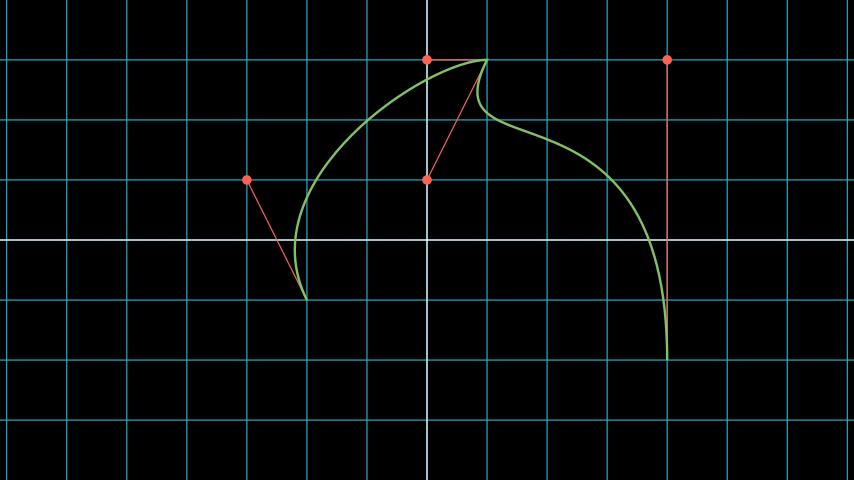

In [21]:
%%manim -v WARNING --disable_caching -ql -s --media_dir ./media VMobjectDemo 

from manim import *

class VMobjectDemo(Scene):
    def construct(self):
        plane = NumberPlane()
        my_vmobject = VMobject(color=GREEN)
        my_vmobject.points = [
            np.array([-2, -1, 0]),  # start of first curve
            np.array([-3, 1, 0]),
            np.array([0, 3, 0]),
            np.array([1, 3, 0]),  # end of first curve
            np.array([1, 3, 0]),  # start of second curve
            np.array([0, 1, 0]),
            np.array([4, 3, 0]),
            np.array([4, -2, 0]),  # end of second curve
        ]
        handles = [
            Dot(point, color=RED) for point in
            [[-3, 1, 0], [0, 3, 0], [0, 1, 0], [4, 3, 0]]
        ]
        handle_lines = [
            Line(
                my_vmobject.points[ind],
                my_vmobject.points[ind+1],
                color=RED,
                stroke_width=2
            ) for ind in range(0, len(my_vmobject.points), 2)
        ]
        self.add(plane, *handles, *handle_lines, my_vmobject)

# VMobjectDemo().render()